<a href="https://colab.research.google.com/github/Rashijain07/rashi_jain/blob/main/SentimentalAnalysisUsingNLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nltk

Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import re #Regular expressions
import nltk
import matplotlib.pyplot as plt

from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split



Load Dataset from Local Directory

In [1]:
from google.colab import files
uploaded= files.upload()

Saving Tweets.csv to Tweets.csv


Importing Dataset

In [4]:
dataset=pd.read_csv('Tweets.csv')
print(dataset.shape)
print(dataset.head(5))

(14640, 15)
             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                   

Segregating dataset into input and output

In [5]:
features= dataset.iloc[:, 10].values
labels=dataset.iloc[:, 1].values
print(labels)

['neutral' 'positive' 'neutral' ... 'neutral' 'negative' 'neutral']


REmoving The Special character

In [6]:
processed_features=[]

for sentence in range(0, len(features)):
  #remove all the special characters
  processed_feature= re.sub(r'\W', ' ', str(features[sentence]))

  #remove all single characters
  processed_feature = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

  #remove single characters from the start
  processed_feature= re.sub('\^[a-zA-Z]\s+', ' ', processed_feature)

  #substituting multiple spaces with single space
  processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

  #removing prefixed 'b'
  processed_feature= re.sub('\^b\s+', ' ', processed_feature)

  #converting to lowercase
  processed_feature=processed_feature.lower()

  processed_features.append(processed_feature)



Feature Extraction from text

In [7]:
nltk.download('stopwords')
vectorizer= TfidfVectorizer(max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features= vectorizer.fit_transform(processed_features).toarray()
print(processed_features)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Train Test Split

In [11]:
X_train, X_test, y_train, y_test= train_test_split(processed_features,labels, test_size=0.25, random_state=0)

Loading Random Forest Algorithm

In [12]:
text_classifier= RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

Predicting the test data with trained model

In [16]:
predictions= text_classifier.predict(X_test)

Score of the Model

In [14]:
print(accuracy_score(y_test, predictions))

0.7549180327868853


CONFUSION MATRIX

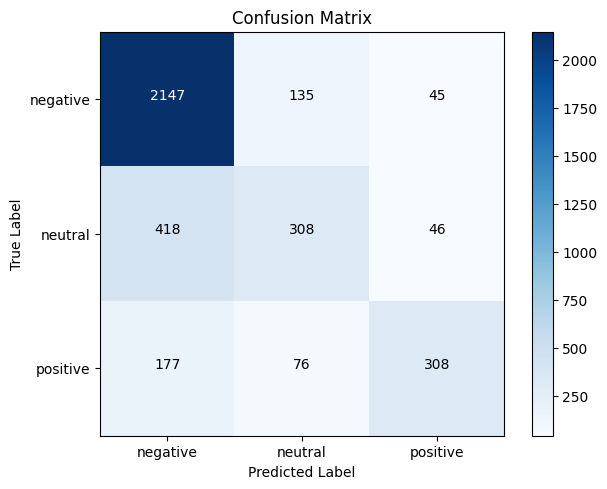

In [15]:
from sklearn import metrics
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)

  thresh = cm.max()/2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i,j],
             horizontalalignment="center",
             color="white" if cm[i, j]> thresh else "black")
  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')

cm=metrics.confusion_matrix(y_test, predictions, labels=["negative", "neutral", "positive"])
plot_confusion_matrix(cm, classes=["negative", "neutral", "positive"])
